In [148]:
import numpy as np
from numpy.random import default_rng
import math
from math import ceil, log
from numpy import e
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

In [149]:
def psi1(t, c1, c2, c3, c4, epsilon, delta, chi):
    return c1*epsilon*e**(-t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c2*epsilon*t*e**(-t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c2*squareroot(epsilon, delta, chi)*e**(-t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c3*epsilon*e**(t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c4*epsilon*t*e**(t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c4*(delta**2 + 2*delta*chi + epsilon**2)*e**(t*squareroot(epsilon, delta, chi)/2) \
    /((delta + 2*chi)*squareroot(epsilon, delta, chi))
    
def psi2(t, c1, c2, c3, c4, epsilon, delta, chi):
    return -c1*squareroot(epsilon, delta, chi)*e**(-t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c2*epsilon*e**(-t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) - \
    c2*t*squareroot(epsilon, delta, chi)*e**(-t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c3*squareroot(epsilon, delta, chi)*e**(t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c4*epsilon*e**(t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c4*t*squareroot(epsilon, delta, chi)*e**(t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi)
    
def phi1(t, c1, c2, c3, c4, epsilon, delta, chi):
    return c1*e**(-t*squareroot(epsilon, delta, chi)/2) + \
    c2*t*e**(-t*squareroot(epsilon, delta, chi)/2) + \
    c3*e**(t*squareroot(epsilon, delta, chi)/2) + \
    c4*t*e**(t*squareroot(epsilon, delta, chi)/2)

def phi2(t, c2, c4, epsilon, delta, chi):
    return c2*e**(-t*squareroot(epsilon, delta, chi)/2) + \
    c4*e**(t*squareroot(epsilon, delta, chi)/2)

def check_sqrt(epsilon, delta, chi):
    return -delta**2 - 2*delta*chi - epsilon**2 < 0

def squareroot(epsilon, delta, chi):
    result = -delta**2 - 2*delta*chi - epsilon**2
    return math.sqrt(result)

def func(xp):
    return (abs(psi1(xp[0], xp[1], xp[2], xp[3], xp[4], xp[5], xp[6], xp[7])))**2 + \
            (abs(psi2(xp[0], xp[1], xp[2], xp[3], xp[4], xp[5], xp[6], xp[7])))**2 + \
            (abs(phi1(xp[0], xp[1], xp[2], xp[3], xp[4], xp[5], xp[6], xp[7])))**2 + \
            (abs(phi2(xp[0], xp[2], xp[4], xp[5], xp[6], xp[7])))**2

In [150]:
# # [t, c1p, c2p, c3p, c4p, epsilonp, deltap, chip]
# x0= [9.99997769055193, -8.042455772869037, 0.4104156269769683, 0.7626971134550099, 0.12854464458518508, 0.775287951314912, 0.5104429911912247, -0.8494864484591551]
# #[9.999999, -8, 0.4, 0.8, 0.1, 0.7, 1.01, -0.8]

# dimension = 8
# x=x0

# intervals = [0.0000001, 0.05, 0.05, 0.05, 0.05, 0.2, 0.0001, 0.02]
# num_points = 20# points for each param
# func_vals_first = [0] * (num_points**2)
# z_count = 0

# data_1 = [0] * num_points #len 20
# data_2 = [0] * num_points #len 20
# lower_lim_1 = x0[1] - num_points/2*intervals[1];
# lower_lim_2 = x0[2] - num_points/2*intervals[2];
# # do all iterations in one program
# # for param1 in range(dimension-1):
# #     num_axs = 7 - param1
# #     for param2 in range(num_axs):

# #treat as just c1 and c2
# for i in range(num_points): #t
#     data_1[i] = lower_lim_1 + i*intervals[1];
#     for j in range(num_points): 
#         data_2[j] = lower_lim_2 + j*intervals[2]; #redundant
#         func_vals_first[z_count] = func([9.99997769055193, data_1[i], data_2[j], 0.7626971134550099, 0.12854464458518508, 0.775287951314912, 0.5104429911912247, -0.8494864484591551])
#         z_count = z_count+1
#     print(z_count)
    
#         #do the check,  if invalid increment, replace index/point and do new obj func value
#             #only need to do if params include epsilon, delta, or chi
# #for loop in range(total_loop):
# print(func_vals_first)

In [151]:
# fig = plt.Figure(figsize=plt.figaspect(1/(7-i)))
# ax = fig.add_subplot(111, projection='3d')
# #ax.scatter3D(data[overall], data[overall+plot_count+1], data[-1])

# #prep data
# #x_vals, x_idx = np.unique(data[overall], return_inverse=True)
# #y_vals, y_idx = np.unique(data[overall+plot_count+1], return_inverse=True)
# X, Y = np.meshgrid(np.array(data_1), np.array(data_2))
# zs = np.array(func_vals_first)
# Z = zs.reshape(X.shape)

# ax.plot_surface(X, Y, Z)

# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

# #print(z_array)
# # print(y)
# #        ax.plot_surface(x, y, z_array, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# #ax.set(xlabel=str(overall), ylabel=str(overall+plot_count+1))
# fig

In [144]:
# # [t, c1p, c2p, c3p, c4p, epsilonp, deltap, chip]
# x0= [9.99997769055193, -7.801182099682966, 0.4104156269769683, 0.8008319691277604, 0.12854464458518508, 0.775287951314912, 0.5104429911912247, -0.8494864484591551]
# #[9.999999, -8, 0.4, 0.8, 0.1, 0.7, 1.01, -0.8]

# dimension = 8

# intervals = [0.0000001, 0.05, 0.05, 0.05, 0.05, 0.2, 0.0001, 0.02]
# num_points = 20 # points for each param
# num_combos = 28

# #  t,c1 ;  t,c2 ;  t,c3 ;  t,c4 ;  t, d ; t, e ;  t, x (7) - t
# # c1,c2 ; c1,c3 ; c1,c4 ; c1, e ; c1, d ; c1, x        (6) - c1
# # c2,c3 ; c2,c4 ; c2, e ; c2, d ; c2, x                (5) - c2
# # c3,c4 ; c3, e ; c3, d ; c3, x                        (4) - c3
# # c4, e ; c4, d ; c4, x                                (3) - c4
# #  e, d ;  e, x                                        (2) - e
# #  d, x                                                (1) - d

# #Initialize param array
# param_data = [] #7 by 20
# for d in range(dimension): #arrays for t-x
#     param_data.append([0] * num_points)

# #Initialize z array
# func_vals = [] #28 by 400
# for c in range(num_combos):
#     func_vals.append([0] * (num_points**2))

# #Initialize lower limits so x0 is midpoint
# lower_lims = []
# for x in range(dimension):
#     lower_lims.append(x0[x] - num_points/2*intervals[x])

# #Fill param arrays
# for d in range(dimension):
#     for i in range(num_points):
#         param_data[d][i] = lower_lims[d] + i*intervals[d]
    
# xp_list = [] #what is passed into func
# combo_count = 0
# #Fill z arrays
# for x in range(dimension-1): #x from c1-x [0, 6]
#     print("x", x)
#     for y in range(7-x):
#         real_y = x+y+1
#         print("\ty", real_y)
#         print("\tcc", combo_count)
#         z_count = 0
#         for i in range(num_points):
#             for j in range(num_points):
#                 xp_list = [9.99997769055193, -7.801182099682966, 0.4104156269769683, 0.8008319691277604, 0.12854464458518508, 0.775287951314912, 0.5104429911912247, -0.8494864484591551] #reset to original vals
#                 #print("\t\tlist",xp_list)
#                 xp_list[x] = param_data[x][i] #replace x param
#                 xp_list[real_y] = param_data[real_y][j] #replace y param
#                 #print("\t\tlist",xp_list)
#                 if check_sqrt(xp_list[5], xp_list[6], xp_list[7]):
#                     func_vals[combo_count][z_count] = 0;
#                 else:
#                     func_vals[combo_count][z_count] = func(xp_list)
#                 z_count = z_count+1
#         combo_count = combo_count+1
          

# print(combo_count)
# # for i in range(num_points): #t
# #     data_1[i] = lower_lim_1 + i*intervals[1];
# #     for j in range(num_points): 
# #         data_2[j] = lower_lim_2 + j*intervals[2]; #redundant
# #         
# #         z_count = z_count+1
# #     print(z_count)
    
# #         #do the check,  if invalid increment, replace index/point and do new obj func value
# #             #only need to do if params include epsilon, delta, or chi
# # #for loop in range(total_loop):
# print(func_vals)

In [155]:
# [t, c1p, c2p, c3p, c4p, epsilonp, deltap, chip]
x0= [9.99997769055193, -7.6403329842255845, 0.4042593925723138, 0.7626971134550099, 0.12854464458518508, 0.775287951314912, 0.5104429911912247, -0.8494864484591551]
#[9.999999, -8, 0.4, 0.8, 0.1, 0.7, 1.01, -0.8]

dimension = 8

#intervals = [0.0000001, 0.05, 0.05, 0.05, 0.05, 0.2, 0.0001, 0.02]
num_points = 20 # points for each param
num_combos = 28

#  t,c1 ;  t,c2 ;  t,c3 ;  t,c4 ;  t, d ; t, e ;  t, x (7) - t
# c1,c2 ; c1,c3 ; c1,c4 ; c1, e ; c1, d ; c1, x        (6) - c1
# c2,c3 ; c2,c4 ; c2, e ; c2, d ; c2, x                (5) - c2
# c3,c4 ; c3, e ; c3, d ; c3, x                        (4) - c3
# c4, e ; c4, d ; c4, x                                (3) - c4
#  e, d ;  e, x                                        (2) - e
#  d, x                                                (1) - d

#Initialize param array
param_data = [] #7 by 20
for d in range(dimension): #arrays for t-x
    param_data.append([0] * num_points)

#Initialize z array
func_vals = [] #28 by 400
for c in range(num_combos):
    func_vals.append([0] * (num_points**2))

#Fill param arrays
for d in range(dimension):
    for i in range(num_points):#0 to 20
        param_data[d][i] = x0[d]*(1+(-0.05+0.005*i))
    
xp_list = [] #what is passed into func
combo_count = 0
#Fill z arrays
for x in range(dimension-1): #x from c1-x [0, 6]
    print("x", x)
    for y in range(7-x):
        real_y = x+y+1
        print("\ty", real_y)
        print("\tcc", combo_count)
        z_count = 0
        for i in range(num_points):
            for j in range(num_points):
                xp_list = [9.99997769055193, -7.6403329842255845, 0.4042593925723138, 0.7626971134550099, 0.12854464458518508, 0.775287951314912, 0.5104429911912247, -0.8494864484591551] #reset to original vals
                #print("\t\tlist",xp_list)
                xp_list[x] = param_data[x][i] #replace x param
                xp_list[real_y] = param_data[real_y][j] #replace y param
                #print("\t\tlist",xp_list)
                if check_sqrt(xp_list[5], xp_list[6], xp_list[7]):
                    func_vals[combo_count][z_count] = 0;
                else:
                    func_vals[combo_count][z_count] = func(xp_list)
                z_count = z_count+1
        combo_count = combo_count+1
          

print(combo_count)
# for i in range(num_points): #t
#     data_1[i] = lower_lim_1 + i*intervals[1];
#     for j in range(num_points): 
#         data_2[j] = lower_lim_2 + j*intervals[2]; #redundant
#         
#         z_count = z_count+1
#     print(z_count)
    
#         #do the check,  if invalid increment, replace index/point and do new obj func value
#             #only need to do if params include epsilon, delta, or chi
# #for loop in range(total_loop):
print(func_vals)

x 0
	y 1
	cc 0
	y 2
	cc 1
	y 3
	cc 2
	y 4
	cc 3
	y 5
	cc 4
	y 6
	cc 5
	y 7
	cc 6
x 1
	y 2
	cc 7
	y 3
	cc 8
	y 4
	cc 9
	y 5
	cc 10
	y 6
	cc 11
	y 7
	cc 12
x 2
	y 3
	cc 13
	y 4
	cc 14
	y 5
	cc 15
	y 6
	cc 16
	y 7
	cc 17
x 3
	y 4
	cc 18
	y 5
	cc 19
	y 6
	cc 20
	y 7
	cc 21
x 4
	y 5
	cc 22
	y 6
	cc 23
	y 7
	cc 24
x 5
	y 6
	cc 25
	y 7
	cc 26
x 6
	y 7
	cc 27
28
[[0.8940929433989844, 0.8637506035182105, 0.835456960309027, 0.8092120137714329, 0.7850157639054285, 0.7628682107110135, 0.7427693541881875, 0.7247191943369515, 0.7087177311573059, 0.6947649646492493, 0.6828608948127821, 0.6730055216479051, 0.6651988451546168, 0.6594408653329189, 0.6557315821828101, 0.6540709957042911, 0.6544591058973617, 0.6568959127620217, 0.6613814162982716, 0.6679156165061108, 0.93640371388593, 0.9035946778748646, 0.8728266837054294, 0.8440997313776255, 0.8174138208914521, 0.7927689522469095, 0.7701651254439967, 0.7496023404827161, 0.7310805973630657, 0.714599896085046, 0.7001602366486575, 0.6877616190538995, 0.677

In [163]:
figs = []
for i in range(7):
    figs.append(plt.Figure(figsize=plt.figaspect(1/(7-i))))

# data stores [t, c1p, c2p, c3p, c4p, epsilonp, deltap, chip, obj]

#  t,c1 ;  t,c2 ;  t,c3 ;  t,c4 ;  t, d ; t, e ;  t, x (7) - t
# c1,c2 ; c1,c3 ; c1,c4 ; c1, e ; c1, d ; c1, x        (6) - c1
# c2,c3 ; c2,c4 ; c2, e ; c2, d ; c2, x                (5) - c2
# c3,c4 ; c3, e ; c3, d ; c3, x                        (4) - c3
# c4, e ; c4, d ; c4, x                                (3) - c4
#  e, d ;  e, x                                        (2) - e
#  d, x                                                (1) - d
combination_index=0
for overall in range(7):
    num_axs = 7 - overall
    for plot_count in range(num_axs):
        ax = figs[overall].add_subplot(1, num_axs, plot_count+1, projection='3d')
        #ax.scatter3D(data[overall], data[overall+plot_count+1], data[-1])
        
        #prep data
        #x_vals, x_idx = np.unique(data[overall], return_inverse=True)
        #y_vals, y_idx = np.unique(data[overall+plot_count+1], return_inverse=True)
        print("var1", overall)
        print("\tvar2", overall+plot_count+1)
        X, Y = np.meshgrid(np.array(param_data[overall]), np.array(param_data[overall+plot_count+1]))
        zs = np.array(func_vals[combination_index])
        Z = zs.reshape(X.shape)

        ax.plot_surface(X, Y, Z)

        ax.set_xlabel(params[overall])
        ax.set_ylabel(params[overall+plot_count+1])
        #print(z_array)
        # print(y)
#        ax.plot_surface(x, y, z_array, cmap=cm.coolwarm, linewidth=0, antialiased=False)
        ax.set_title(params[overall] + ' and ' + params[overall+plot_count+1])
        #ax.set(xlabel=str(overall), ylabel=str(overall+plot_count+1))
        combination_index = combination_index + 1

var1 0
	var2 1
var1 0
	var2 2
var1 0
	var2 3
var1 0
	var2 4
var1 0
	var2 5
var1 0
	var2 6
var1 0
	var2 7
var1 1
	var2 2
var1 1
	var2 3
var1 1
	var2 4
var1 1
	var2 5
var1 1
	var2 6
var1 1
	var2 7
var1 2
	var2 3
var1 2
	var2 4
var1 2
	var2 5
var1 2
	var2 6
var1 2
	var2 7
var1 3
	var2 4
var1 3
	var2 5
var1 3
	var2 6
var1 3
	var2 7
var1 4
	var2 5
var1 4
	var2 6
var1 4
	var2 7
var1 5
	var2 6
var1 5
	var2 7
var1 6
	var2 7


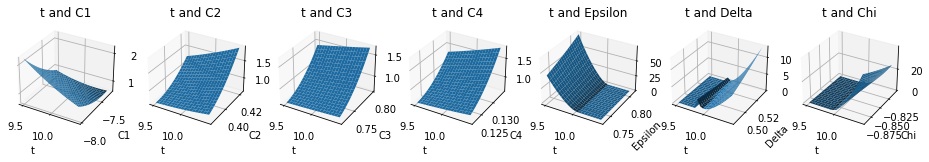

In [164]:
figs[0]

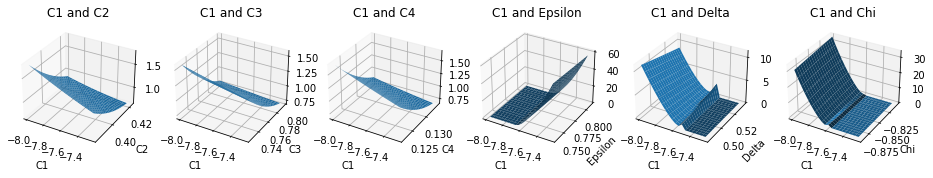

In [165]:
figs[1]
#1 more sensitive than 5, 6, 7

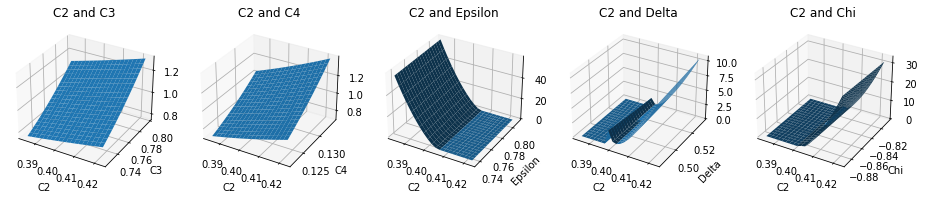

In [166]:
figs[2]

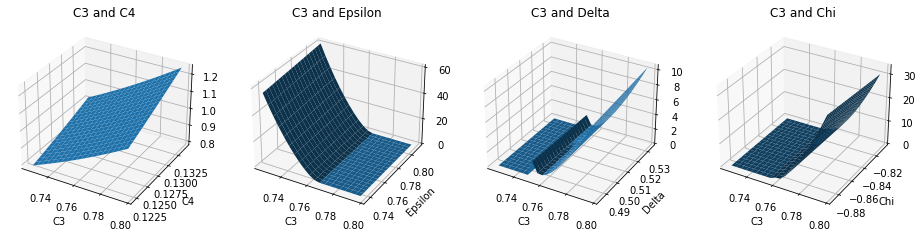

In [167]:
figs[3]

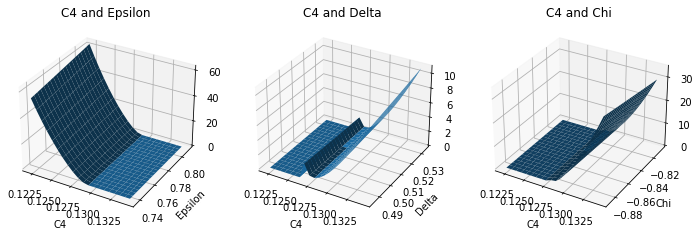

In [168]:
figs[4]

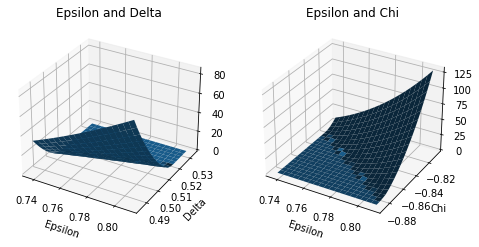

In [169]:
figs[5]

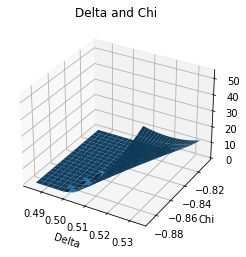

In [170]:
figs[6]

In [171]:
params = ["t", "C1", "C2", "C3", "C4", "Epsilon", "Delta", "Chi"]

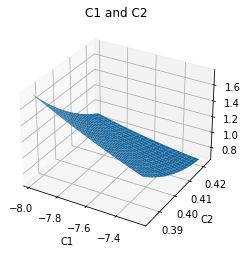

In [172]:
fig_c12 = plt.Figure()#figsize=plt.figaspect(1/(7-i)))
ax_c12 = fig_c12.add_subplot(111, projection='3d')
#ax.scatter3D(data[overall], data[overall+plot_count+1], data[-1])

#prep data
#x_vals, x_idx = np.unique(data[overall], return_inverse=True)
#y_vals, y_idx = np.unique(data[overall+plot_count+1], return_inverse=True)
X_c12, Y_c12 = np.meshgrid(np.array(param_data[1]), np.array(param_data[2]))
zs_c12 = np.array(func_vals[7]) #combo 7 = c1, c2
Z_c12 = zs_c12.reshape(X_c12.shape)

ax_c12.plot_surface(X_c12, Y_c12, Z_c12)

ax_c12.set_xlabel(params[1])
ax_c12.set_ylabel(params[2])
ax_c12.set_title(params[1] + ' and ' + params[2])


#print(z_array)
# print(y)
#        ax.plot_surface(x, y, z_array, cmap=cm.coolwarm, linewidth=0, antialiased=False)
#ax.set(xlabel=str(overall), ylabel=str(overall+plot_count+1))
fig_c12

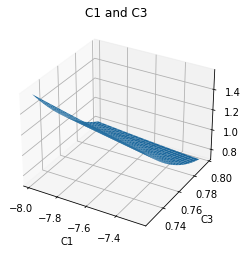

In [173]:
fig_c13 = plt.Figure()#figsize=plt.figaspect(1/(7-i)))
ax_c13 = fig_c13.add_subplot(111, projection='3d')
#ax.scatter3D(data[overall], data[overall+plot_count+1], data[-1])

#prep data
#x_vals, x_idx = np.unique(data[overall], return_inverse=True)
#y_vals, y_idx = np.unique(data[overall+plot_count+1], return_inverse=True)
X_c13, Y_c13 = np.meshgrid(np.array(param_data[1]), np.array(param_data[3]))
zs_c13 = np.array(func_vals[8]) #combo 8 = c1, c3
Z_c13 = zs_c13.reshape(X_c13.shape)

ax_c13.plot_surface(X_c13, Y_c13, Z_c13)

ax_c13.set_xlabel(params[1])
ax_c13.set_ylabel(params[3])
ax_c13.set_title(params[1] + ' and ' + params[3])


#print(z_array)
# print(y)
#        ax.plot_surface(x, y, z_array, cmap=cm.coolwarm, linewidth=0, antialiased=False)
#ax.set(xlabel=str(overall), ylabel=str(overall+plot_count+1))
fig_c13

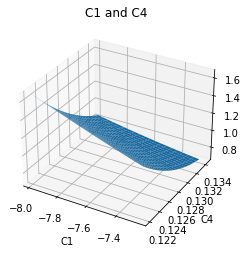

In [174]:
fig_c14 = plt.Figure()#figsize=plt.figaspect(1/(7-i)))
ax_c14 = fig_c14.add_subplot(111, projection='3d')
#ax.scatter3D(data[overall], data[overall+plot_count+1], data[-1])

#prep data
#x_vals, x_idx = np.unique(data[overall], return_inverse=True)
#y_vals, y_idx = np.unique(data[overall+plot_count+1], return_inverse=True)
X_c14, Y_c14 = np.meshgrid(np.array(param_data[1]), np.array(param_data[4]))
zs_c14 = np.array(func_vals[9]) #combo 9 = c1, c4
Z_c14 = zs_c14.reshape(X_c14.shape)

ax_c14.plot_surface(X_c14, Y_c14, Z_c14)

ax_c14.set_xlabel(params[1])
ax_c14.set_ylabel(params[4])
ax_c14.set_title(params[1] + ' and ' + params[4])


#print(z_array)
# print(y)
#        ax.plot_surface(x, y, z_array, cmap=cm.coolwarm, linewidth=0, antialiased=False)
#ax.set(xlabel=str(overall), ylabel=str(overall+plot_count+1))
fig_c14

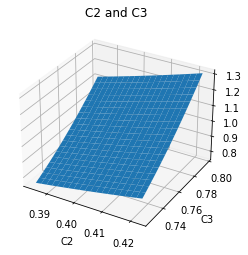

In [175]:
fig_c23 = plt.Figure()#figsize=plt.figaspect(1/(7-i)))
ax_c23 = fig_c23.add_subplot(111, projection='3d')
#ax.scatter3D(data[overall], data[overall+plot_count+1], data[-1])

#prep data
#x_vals, x_idx = np.unique(data[overall], return_inverse=True)
#y_vals, y_idx = np.unique(data[overall+plot_count+1], return_inverse=True)
X_c23, Y_c23 = np.meshgrid(np.array(param_data[2]), np.array(param_data[3]))
zs_c23 = np.array(func_vals[13]) #combo 13 = c2, c3
Z_c23 = zs_c23.reshape(X_c23.shape)

ax_c23.plot_surface(X_c23, Y_c23, Z_c23)

ax_c23.set_xlabel(params[2])
ax_c23.set_ylabel(params[3])
ax_c23.set_title(params[2] + ' and ' + params[3])


#print(z_array)
# print(y)
#        ax.plot_surface(x, y, z_array, cmap=cm.coolwarm, linewidth=0, antialiased=False)
#ax.set(xlabel=str(overall), ylabel=str(overall+plot_count+1))
fig_c23